In [1]:
import random as rand
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
nusers = 100
nitems = 100
k = 10

pu = np.random.rand(k,1)

Q = np.random.rand(nitems,k)
nQ = np.dot(Q,Q.T)

ru = np.dot(Q,pu)
D = (np.diag(nQ) + np.diag(nQ.T) - 2*nQ)
nitems = len(ru)
ntrans=200
state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
action = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)
next_state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
for i in range(0, len(state)):
    next_state[i][0]=state[i][1]
    next_state[i][1]=action[i][0]


In [3]:
act = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)

In [4]:
ru

array([[1.56128825],
       [2.36601107],
       [2.99103057],
       [2.0997648 ],
       [1.70661178],
       [2.09597932],
       [2.13444681],
       [2.10956527],
       [2.78907184],
       [3.24652414],
       [3.40067299],
       [2.13566327],
       [2.1888978 ],
       [1.7940297 ],
       [2.80078399],
       [2.03063513],
       [2.64652851],
       [2.2734925 ],
       [2.77263775],
       [2.06040362],
       [2.19522272],
       [2.53306819],
       [2.07052744],
       [2.92386723],
       [3.09284189],
       [2.07561601],
       [2.56279198],
       [2.30519654],
       [2.9298215 ],
       [1.49453173],
       [2.74175375],
       [2.57129619],
       [3.19461548],
       [1.58013346],
       [2.7973079 ],
       [1.48464495],
       [1.93708296],
       [2.298042  ],
       [2.63630735],
       [2.00251398],
       [2.30179809],
       [2.45343746],
       [2.27464527],
       [3.20878812],
       [1.28495806],
       [2.23870241],
       [1.97812577],
       [2.970

In [5]:
len(ru)

100

In [6]:
dataset = pd.DataFrame({'state': list(state), 'action': list(action), 'next_state': list(next_state)}, columns=['state', 'action', 'next_state'])

In [7]:
dataset

,state,action,next_state
0,"[97, 9]",[99],"[9, 99]"
1,"[71, 81]",[40],"[81, 40]"
2,"[90, 38]",[4],"[38, 4]"
3,"[69, 84]",[35],"[84, 35]"
4,"[34, 28]",[77],"[28, 77]"
...,...,...,...
195,"[95, 18]",[90],"[18, 90]"
196,"[17, 54]",[35],"[54, 35]"
197,"[83, 55]",[4],"[55, 4]"
198,"[96, 12]",[57],"[12, 57]"


In [8]:
def getReward1(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0]
        for i in range(0, len(state)):
            if state[i]==-1:
                break
            else:
                reward += (1/((len(state)-i)+1)) * dist[(state[i])*nitems + action] 
               
    except IndexError:
        reward = 0
        print("asr")
    reward=np.ceil(reward)
    return reward

In [9]:
def getReward(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0] +  dist[(state[0])*nitems + action] + dist[(state[1])*nitems + action]
    except IndexError:
        reward = 1.5
    return reward

In [10]:
reward=[]
for i in range(0,len(state)):
    reward.append(getReward(ru, D, state[i],action[i]))

#reward = ru[action[0]][0] + DD[(state[1])*nitems + action[0]]
    

In [11]:
dataset["reward"]=reward

In [12]:
dataset

,state,action,next_state,reward
0,"[97, 9]",[99],"[9, 99]",[1.5408309488605643]
1,"[71, 81]",[40],"[81, 40]",[4.103874612143602]
2,"[90, 38]",[4],"[38, 4]",[1.1440409474246112]
3,"[69, 84]",[35],"[84, 35]",[1.4539119865056558]
4,"[34, 28]",[77],"[28, 77]",[4.242738568131978]
...,...,...,...,...
195,"[95, 18]",[90],"[18, 90]",[10.102234067244204]
196,"[17, 54]",[35],"[54, 35]",[1.364338362887147]
197,"[83, 55]",[4],"[55, 4]",[1.080091709752752]
198,"[96, 12]",[57],"[12, 57]",[3.287049838165851]


In [13]:
from gym import Env
from gym.spaces import Discrete, Box
from numpy import int64

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from gym.spaces import Box, Discrete
from tqdm import tqdm

  
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

2023-02-15 22:46:17.779176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 22:46:18.691416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-15 22:46:18.691467: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-15 22:46:22.787980: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

In [14]:
a=Box(low=0, high=99, shape=(1,2), dtype=int64)
k=a.sample()
print(k.shape)


(1, 2)


In [15]:
observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
a=observation_space.sample().ravel()
print(a)
action=89
a=np.append(a, action)
a[2]
if action in a:
    print("Asr")
else:
    print("as")

[38 61]
Asr


In [16]:
class CustomEnv1(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,10), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        
    def step(self,action):
        self.i+=1 
        for j in range(self.i,10):
            self.state[j]=-1
        
        self.next_state = self.observation_space.sample().ravel()
        #self.next_state[0] = self.state[1]
        #self.next_state[1]= action
        
        if action in self.state:
            self.state[self.i]=action
            reward = -10
        else:  
            self.state[self.i]=action 
            reward = getReward1(ru, D, self.state, action)
        
        if self.i==9:
            print(self.state)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [17]:
class CustomEnv(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        self.a=self.state
        
    def step(self,action):
        self.i+=1
        self.next_state = self.observation_space.sample().ravel()
        self.next_state[0] = self.state[1]
        self.next_state[1]= action
        #print(self.next_state)
        if action in self.a:
            reward=-100
        else:
            reward= getReward(ru, D, self.state, action)
        self.state=self.next_state
        self.a=np.append(self.a,action)
        if self.i==12:
            print(self.a)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.a=[]
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [18]:
env = CustomEnv1()

In [19]:
a=env.observation_space.sample().ravel()

print(a)
a[0]

[38 34 86 69 62 54 41  4 82 99]


38

In [20]:
episodes = 10 #20 shower episodes
for episode in tqdm(range(1, episodes+1)):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 10/10 [00:00<00:00, 649.52it/s]

[33  8 40 78 66 75 59 51 56 53]
Episode:1 Score:34.0
[14 84 71 14 85 42 64 69 60 62]
Episode:2 Score:23.0
[99 43 44 13 32 65  0 62  6  4]
Episode:3 Score:32.0
[74 76 92 58 81 17 66 27 75 89]
Episode:4 Score:33.0
[94 22 83 64 89 84 89 76 16  4]
Episode:5 Score:21.0
[84 78 56 59 97 10 83 45 67 89]
Episode:6 Score:35.0
[82 58 93 52 86 95 61 46 64 12]
Episode:7 Score:37.0
[22 98 48 44 58 25 52 20  5 93]
Episode:8 Score:35.0
[43 86 97 80 82 87 72 82 83  0]
Episode:9 Score:18.0
[61 57 66 43 31 49 98 11 74 36]
Episode:10 Score:33.0


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.optimizers import Adam

In [22]:
states = np.shape(env.observation_space)
actions = env.action_space.n

In [23]:
states

(1, 10)

In [24]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [25]:
model = build_model(states, actions)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             264       
                                                                 
 dense_1 (Dense)             (None, 1, 24)             600       
                                                                 
 dense_2 (Dense)             (None, 1, 24)             600       
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 100)               2500      
                                                                 
Total params: 3,964
Trainable params: 3,964
Non-trainable params: 0
_________________________________________________________________


In [27]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=0.0)
    return dqn

In [28]:

#Adam._name = 'hey'

In [29]:

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-4), metrics=['mae'])
history=dqn.fit(env, nb_steps=1200, visualize=False, verbose=2, action_repetition=1)

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-02-15 22:46:32.042349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-15 22:46:32.042463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-15 22:46:32.042552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could n

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training for 1200 steps ...


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-02-15 22:46:32.840751: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3/BiasAdd' id:159 op device:{requested: '', assigned: ''} def:{{{node dense_3/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_3/MatMul, dense_3/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-02-15 22:46:32.864569: W tensorflow/c/c_api.cc:291] Operation '{name:'count_2/Assign' id:495 op device:{requested: '', assigned: ''} def:{{{node count_2/Assign}} = AssignVariableOp[_has_manual_co

[92 52 52 61 61 62 52 61 61 52]
    9/1200: episode: 1, duration: 0.282s, episode steps:   9, steps per second:  32, episode reward: -48.000, mean reward: -5.333 [-10.000,  5.000], mean action: 57.111 [52.000, 62.000],  loss: --, mae: --, mean_q: --


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-02-15 22:46:33.077012: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3_1/BiasAdd' id:317 op device:{requested: '', assigned: ''} def

[17 52 34 61 88 54 61 61 73 56]
   18/1200: episode: 2, duration: 0.991s, episode steps:   9, steps per second:   9, episode reward:  6.000, mean reward:  0.667 [-10.000,  6.000], mean action: 60.000 [34.000, 88.000],  loss: 296.150820, mae: 6.477984, mean_q: 18.053942
[ 0 94 55 61 61 61 61 61 61 56]
   27/1200: episode: 3, duration: 0.059s, episode steps:   9, steps per second: 152, episode reward: -37.000, mean reward: -4.111 [-10.000,  5.000], mean action: 63.444 [55.000, 94.000],  loss: 210.668243, mae: 5.866964, mean_q: 15.634769
[57 67 61 49 61 49 61 61 61 62]
   36/1200: episode: 4, duration: 0.059s, episode steps:   9, steps per second: 153, episode reward: -37.000, mean reward: -4.111 [-10.000,  4.000], mean action: 59.111 [49.000, 67.000],  loss: 210.433945, mae: 5.799508, mean_q: 14.963331
[23 52 61 56 61 52 67 56 56 52]
   45/1200: episode: 5, duration: 0.059s, episode steps:   9, steps per second: 153, episode reward: -37.000, mean reward: -4.111 [-10.000,  4.000], mean ac

In [30]:
# dqn.save_weights('models/dqn_0.h5')

In [31]:
a=[[ np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1]]
a=[[ np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1, -1, -1]]
t=0
idx=2
test= [[88, 41, 49, 42, 69, 43, 81, 6, 20, -1]]

test_reward=dqn.compute_q_values(test)
max_v=max(test_reward)
print(test_reward)
rrr=test_reward.tolist()
index = rrr.index(max_v)
print(index)
rrr[index]=-100
max_v=max(rrr)
print(rrr.index(max_v))
reward=[]

for i in range(idx,10):
        z=dqn.compute_q_values(a)
        max_v=max(z)
        t+=max_v
        #print(max_v)
        z=z.tolist()
        index = z.index(max_v)
        a[0][i]=index
res=a[0]
reward.append(t)
    
    
print("Episode =", a[0])
print("Reward =", t)

[ -5.630931    -2.0372126    1.7237372    2.2641776    3.1353781
   0.9577684   -2.4166229   -2.7784238    0.42090893  -5.427659
  -1.6318069   -2.229097    -2.1768632    1.6543078    3.9044056
   2.9974349  -10.941061     2.7630966   -0.47540024  -6.5820584
   1.7773092   -1.2063357   -0.97450686  -0.677524     4.8842454
  -2.8922102    2.4050481   -3.308265     0.5884217   -4.422771
   0.9536316    2.712778    -1.8337648    0.853318     1.304051
  -2.6457279    2.2638466   -5.5310316   -5.759988     1.9146218
   1.9806455    0.712609     0.8629408    2.6463268    0.74202925
   2.3195262   -7.31515     -0.87045455  -3.9902909   -2.1557198
  -6.923246     3.5877008   -5.9758654   -5.0120063   -4.868864
   3.3855934   -4.7736797   -6.474283     1.566026    -5.964697
  -2.9168181   -2.5490308   -3.787272     1.5914617   -3.4062774
  -1.5971748    3.9447598   -1.3638345    2.765533    -0.5557538
   3.8179898    3.3290653   -0.01536263   2.7460237   -1.5769355
   0.7845599   -5.9223804   -

In [32]:
# a=env.observation_space.sample().ravel()
# print(a)
import wandb
wandb.init()
b=[]


reward=[]
print('DQN')

for j in range(0, 100):
    t=0
    if(j<0):
        idx=1
        a=[[ np.random.randint(0,100), -1, -1, -1, -1, -1, -1, -1, -1, -1]]
        b.append(a[0][0])
        print("Input state =", a)
    else:
        idx=4
        a=[[ np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1]]
        b.append(a[0][0])
        b.append(a[0][1])
        b.append(a[0][2])
        b.append(a[0][3])
        print("Input state =", a)

    for i in range(idx,10):
        z=dqn.compute_q_values(a)
        max_v=max(z)
        t+=max_v
        #print(max_v)
        z=z.tolist()
        index = z.index(max_v)
        while index in a[0]:
            t-=max_v
            # print("Nooo")
            z[index]=-100000000
            max_v=max(z)
            t+=max_v
        #print(max_v)
            index = z.index(max_v)
        a[0][i]=index
    res=a[0]
    reward.append(t)
    
    
    print("Episode =", a[0])
    print("Reward =", t)
xx=[i for i in range(0,100)]
data = [[x, y] for (x, y) in zip(xx, reward)]
table = wandb.Table(data=data, columns = ["episode comp", "total reward"])
wandb.log({"custom_plot" : wandb.plot.line(table, "episode comp","total reward",
           title="greedy vs rl")})




/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aayush-singharoy. Use `wandb login --relogin` to force relogin
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display  # type: ignore


DQN
Input state = [[72, 1, 75, 44, -1, -1, -1, -1, -1, -1]]
Episode = [72, 1, 75, 44, 69, 49, 43, 24, 40, 66]
Reward = 23.39728879928589
Input state = [[79, 36, 79, 69, -1, -1, -1, -1, -1, -1]]
Episode = [79, 36, 79, 69, 23, 74, 48, 3, 89, 70]
Reward = 29.56621527671814
Input state = [[30, 19, 31, 42, -1, -1, -1, -1, -1, -1]]
Episode = [30, 19, 31, 42, 23, 74, 48, 89, 70, 66]
Reward = 22.834362745285034
Input state = [[21, 0, 12, 85, -1, -1, -1, -1, -1, -1]]
Episode = [21, 0, 12, 85, 70, 42, 23, 10, 9, 80]
Reward = 14.020022988319397
Input state = [[45, 88, 78, 78, -1, -1, -1, -1, -1, -1]]
Episode = [45, 88, 78, 78, 74, 70, 30, 87, 89, 80]
Reward = 32.980347871780396
Input state = [[76, 60, 31, 43, -1, -1, -1, -1, -1, -1]]
Episode = [76, 60, 31, 43, 10, 74, 48, 3, 36, 55]
Reward = 32.53164601325989
Input state = [[92, 29, 28, 2, -1, -1, -1, -1, -1, -1]]
Episode = [92, 29, 28, 2, 36, 58, 82, 80, 71, 24]
Reward = 36.149043798446655
Input state = [[47, 15, 34, 3, -1, -1, -1, -1, -1, -1]]


In [33]:

wandb.init()
nitems = len(ru)
t=0
dist = D.flatten()
print("Greedy Algo")
idx=0
p=0
reward=[]
for v in range(0,100):
    t=0
    if(j<0):
        idx=0
        state=[b[j]]
        print("Input state =", state)
    else:
        state=[b[4*v], b[4*v+1], b[4*v+2], b[4*v+3]]
        idx=3
        print("Input state =", state)
    for k in range(idx,9):
        a=[0]*100
        for j in range(0, 100):
            # if j in state:
            #     a[j]=-100000
            # else:
            #     a[j]=getReward1(ru, D, state, j)
            a[j]=ru[j][0]
            # k=len(state)
            # if j in state:
            #     a[j]+=-10
            # else:
            #     a[j]+=dist[(state[k-1])*nitems + j]
            for i in range(4, len(state)):
                if j in state:
                    a[j]+=-20
                else:
                    a[j]+= (1/((len(state)-i)+1)) * dist[(state[i])*nitems + j]
        
        max_v=max(a)
        
        index = a.index(max_v)
        t+=max_v
        t=np.ceil(t)
        # state[idx]=index
        # idx+=1
        state.append(index)
    print("Episode =", state)
    print("Reward =",t)
    reward.append(t)
xx=[i for i in range(0,100)]

data = [[x, y] for (x, y) in zip(xx, reward)]
data = [[x, y] for (x, y) in zip(xx, reward)]
table = wandb.Table(data=data, columns = ["episode comp", "total reward"])
wandb.log({"custom_plot" : wandb.plot.line(table, "episode comp","total reward",
           title="Greedy vs rl")})
# reward_dict={"episode_reward":reward}
# reward_df=pd.DataFrame(reward_dict)
# reward_table=wandb.Table(data=reward_df, columns=["rewards"])
# wandb.log({'reward_per_session':wandb.plot.line(reward_table, xx, reward)})








/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:58: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


Greedy Algo
Input state = [72, 1, 75, 44]
Episode = [72, 1, 75, 44, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [79, 36, 79, 69]
Episode = [79, 36, 79, 69, 52, 32, 41, 61, 10, 24]
Reward = 32.0
Input state = [30, 19, 31, 42]
Episode = [30, 19, 31, 42, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [21, 0, 12, 85]
Episode = [21, 0, 12, 85, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [45, 88, 78, 78]
Episode = [45, 88, 78, 78, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [76, 60, 31, 43]
Episode = [76, 60, 31, 43, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [92, 29, 28, 2]
Episode = [92, 29, 28, 2, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [47, 15, 34, 3]
Episode = [47, 15, 34, 3, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [50, 90, 22, 48]
Episode = [50, 90, 22, 48, 52, 32, 41, 61, 10, 69]
Reward = 32.0
Input state = [17, 22, 10, 18]
Episode = [17, 22, 10, 18, 52, 32, 41, 61, 69, 24]
Reward = 32.0
Input state = [14, 40, 9, 27]
Episod

In [34]:
print(model.output_shape)
print(actions)
results = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(results.history['episode_reward'])) 


(None, 100)
100
Testing for 10 episodes ...
[15 24 48 43 53 10 10 10 53 23]
Episode 1: reward: -4.000, steps: 9
[ 5 23 48 43 53 23 10 23 53 23]
Episode 2: reward: -20.000, steps: 9
[ 5 69 48 93 10 10 10 10 10 10]
Episode 3: reward: -34.000, steps: 9
[76 55 55 74 10 74 48 48 74 55]
Episode 4: reward: -33.000, steps: 9
[ 5 11 48 64 18 18 11 53 12 10]
Episode 5: reward: 13.000, steps: 9
[39  9 75 64 23 11 11 11 11 11]
Episode 6: reward: -22.000, steps: 9
[74 72 75 74 74 74 30 30 30  3]
Episode 7: reward: -38.000, steps: 9
[87 18 75 15 15 69 43 66 70 24]
Episode 8: reward: 29.000, steps: 9
[71 66 75 74 70 74 30 30 30  3]
Episode 9: reward: -7.000, steps: 9
[51 43 75 66 10 10 10 10 10 10]
Episode 10: reward: -35.000, steps: 9
-15.1


In [35]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

In [36]:
EPISODES = 1000 # number of episodes to run
BATCH_SIZE = 32 # batch size for the replay buffer
MEMORY_SIZE = 10000 # size of the replay buffer
GAMMA = 0.95 # discount factor for future rewards
EPSILON_MAX = 1.0 # maximum exploration rate
EPSILON_MIN = 0.01 # minimum exploration rate
EPSILON_DECAY = 0.995 # decay rate for exploration rate
LEARNING_RATE = 0.001 # learning rate for the neural network

In [37]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.epsilon = EPSILON_MAX
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self._build_model().to(self.device)
        self.target_model = self._build_model().to(self.device)
    
    def _build_model(self):
        model = nn.Sequential(
            nn.Linear(self.state_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_size)
        )
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.model.eval()
        with torch.no_grad():
            action_values = self.model(state)
        self.model.train()
        return np.argmax(action_values.cpu().data.numpy())
    
    def replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        minibatch = random.sample





In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class DQN(nn.Module):
    def __init__(self, states, actions):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(states[1], 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, 24)
        self.fc4 = nn.Linear(24, actions)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = x.view(x.size(0), -1)
        x = self.fc4(x)
        return x
    # def __init__(self, state_size, action_size):
    #     super(DQN, self).__init__()
    #     self.fc1 = nn.Linear(state_size[1], 32)
    #     self.fc2 = nn.Linear(32, 64)
    #     self.fc3 = nn.Linear(64, action_size)

    # def forward(self, x):
    #     x = torch.relu(self.fc1(x))
    #     x = torch.relu(self.fc2(x))
    #     x = self.fc3(x)
    #     return x

class Agent:
    def __init__(self, state_size, action_size, gamma, epsilon, epsilon_min, epsilon_decay, learning_rate, memory_size, batch_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate
        self.memory_size = memory_size
        self.batch_size = batch_size

        self.model = DQN(state_size, action_size)
        self.target_model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.memory = []
        self.steps = 0

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)
        state = torch.from_numpy(state).float().unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
            return torch.argmax(q_values).item()
    
    def q_values(self,state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
            return q_values


    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > self.memory_size:
            self.memory.pop(0)

    def replay(self):
        if len(self.memory) < self.batch_size:
            return

        samples = np.random.choice(len(self.memory), self.batch_size, replace=False)
        states, actions, rewards, next_states, dones = zip(*[self.memory[i] for i in samples])

        states = torch.from_numpy(np.vstack(states)).float()
        actions = torch.from_numpy(np.vstack(actions)).long()
        rewards = torch.from_numpy(np.vstack(rewards)).float()
        next_states = torch.from_numpy(np.vstack(next_states)).float()
        dones = torch.from_numpy(np.vstack(dones).astype(np.uint8)).float()

        q_values = self.model(states).gather(1, actions)
        next_q_values = self.target_model(next_states).detach().max(1)[0].unsqueeze(1)
        targets = rewards + (1 - dones) * self.gamma * next_q_values

        loss = nn.MSELoss()(q_values, targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.steps += 1
        if self.steps % 10 == 0:
            self.update_target_model()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

# Example usage
env = CustomEnv1()
agent = Agent(state_size=(1,10), action_size=100, gamma=0.0, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, learning_rate=0.001, memory_size=10000, batch_size=32)


In [82]:
num_episodes=1300
max_steps=10
for episode in range(num_episodes):
    state = env.reset()
    for step in range(max_steps):
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        if done:
            break

[97 76 10 11 13 28 11 93  0 51]
[45 74 52 38 99 42 99 86 23 60]
[67 91 29 15 21 76  2 33 26  6]
[96  0 18 41 78 40 35 55  2 48]
[16 82 92 15 50 96 21 66 11 70]
[ 5 13 27 79 56 38 85 55 99 78]
[33 59  5 21 64 54 51 51 93 87]
[38 71  2 51 85 30 51 51 92 41]
[45 91 64 91 91 91 62 48 66 60]
[48 78 92 73 63  2 38 16 41 23]
[72 53 65 12 66 61 55 99 57 23]
[40 92 36 78 71 38  1 19 56 21]
[97 59 93 98 38 67 33 23 23 73]
[91 19 32 23 23 24  1 17 95 71]
[87 71 95 23 61 31 33 37  2  2]
[37 18 95 78 71 73 51 34 18 55]
[37 31 71 73 18 73 71  1 28 71]
[12 61  7 73 76 73 30 26 65 93]
[82 37 69 55 38 63 70 61 20  1]
[22 70 12 38 31 73 37 55  2 43]
[62 92 65 55 73 55 55 55 55 48]
[27 20 68  0 38 68 61 56 61 54]
[60 61 27 38 76 38 38 18 65 49]
[33 11 32 61 77 43 61 41 24 71]
[39 28 38 38 38 38 86 61 95 28]
[32 47 32 38 43 38 21 48 48 97]
[ 6 41 61 73 41 81 34 55 27 34]
[31 30 32 73 73 20 88 23 23 23]
[ 7 41 70 53 73 15 20  0 37 78]
[69 41 51 43 43 64 73 17 33 41]
[46 41 73 73 67 73 21 30  8 21]
[93 41 5

In [83]:
state = env.reset()

while True:
    action = agent.act(state)
    q_values=agent.q_values(state)
    while action in state:
        k=torch.argmax(q_values).item()
        q_values[0,k]=0
        action=torch.argmax(q_values).item()
    next_state, reward, done, info = env.step(action)
    state = next_state
    if done:
        break

[54 23 80 82 63 91 90 30 85 32]


In [86]:
from tqdm import tqdm
t=0
state=np.array([[49,61,74, 48, -1, -1, -1, -1, -1, -1]])
for i in tqdm(range(4,10)):
    q_values=agent.q_values(state)
    max_v=torch.max(q_values)
    t+=max_v
    k=torch.argmax(q_values).item()

    while(k in state[0]):
        print(True)
        t-=max_v
        q_values[0,k]=0
        k=torch.argmax(q_values).item()
        max_v = torch.max(q_values)
        t+=max_v
    state[0][i]=k
print(state)
print(t)

100%|██████████| 6/6 [00:00<00:00, 1801.42it/s]

True
True
True
[[49 61 74 48 91 63 90 31 85 10]]
tensor(46.5650)


In [ ]:
# import rl.callbacks
# class EpisodeLogger(rl.callbacks.Callback):
#     def __init__(self):
#         self.observations = {}
#         self.rewards = {}
#         self.actions = {}

#     def on_episode_begin(self, episode, logs):
#         self.observations[episode] = []
#         self.rewards[episode] = []
#         self.actions[episode] = []
        
#     def on_step_end(self, step, logs):
#         episode = logs['episode']
#         self.observations[episode].append(logs['observation'])
#         print(logs['observation'])
#         print(logs['reward'])
#         print(logs['action'])
#         self.rewards[episode].append(logs['reward'])
#         self.actions[episode].append(logs['action'])

# cb_ep = EpisodeLogger()
# dqn.test(env, nb_episodes=10, visualize=False, callbacks=[cb_ep])


# %matplotlib inline
# import matplotlib.pyplot as plt

# for obs in cb_ep.rewards.values():
#     plt.plot([o for o in obs])
# plt.xlabel("step")
# plt.ylabel("reward")

In [ ]:
rewards=[]
for obs in cb_ep.rewards.values():
    rewards.append(obs)

NameError: name 'cb_ep' is not defined

In [ ]:
cum_reward=[]
for i in rewards:
    p=0
    u=[]
    for j in i:
        j*=-1
        p+=j
        u.append(p)
    cum_reward.append(u)

ValueError: x and y must have same first dimension, but have shapes (12,) and (9,)

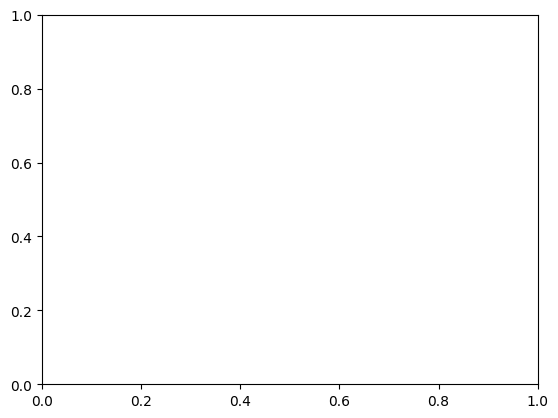

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
x=list(range(12))
for i in range(7):
    purchases = cum_reward[i]
    for j in range(len(purchases)):
        plt.plot(x,purchases)
        plt.xlabel("step")
        plt.ylabel("reward")